We will construct a linear model that explains the relationship a car's mileage has with its other attributes.

### Import Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell

%matplotlib inline

InteractiveShell.ast_node_interactivity = "all"

sns.set(color_codes=True)
sns.set_style(style="darkgrid")

### Load and review data

In [41]:
data = pd.read_csv('auto-mpg.csv')
data.head()
data.shape

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


(398, 9)

In [42]:
data = data.drop('car name', axis=1)
data['origin'] = data['origin'].replace({1:'america',2:'europe',3:'asia'})
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


### Create dummy variables

One-hot encode origin column:

In [43]:
data = pd.get_dummies(data, columns=['origin'])
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


### Dealing with missing values

In [44]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [45]:
data.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [46]:
hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())
data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [47]:
data.replace('?', np.nan, inplace=True)

In [48]:
data.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
model year          76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [49]:
medianFiller = lambda x: x.fillna(x.median())
data = data.apply(medianFiller, axis=0)
data['horsepower'] = data['horsepower'].astype('float64')

## Bivariate Plots

A bivariate analysis among the different variables can be done using a scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a PNG file.

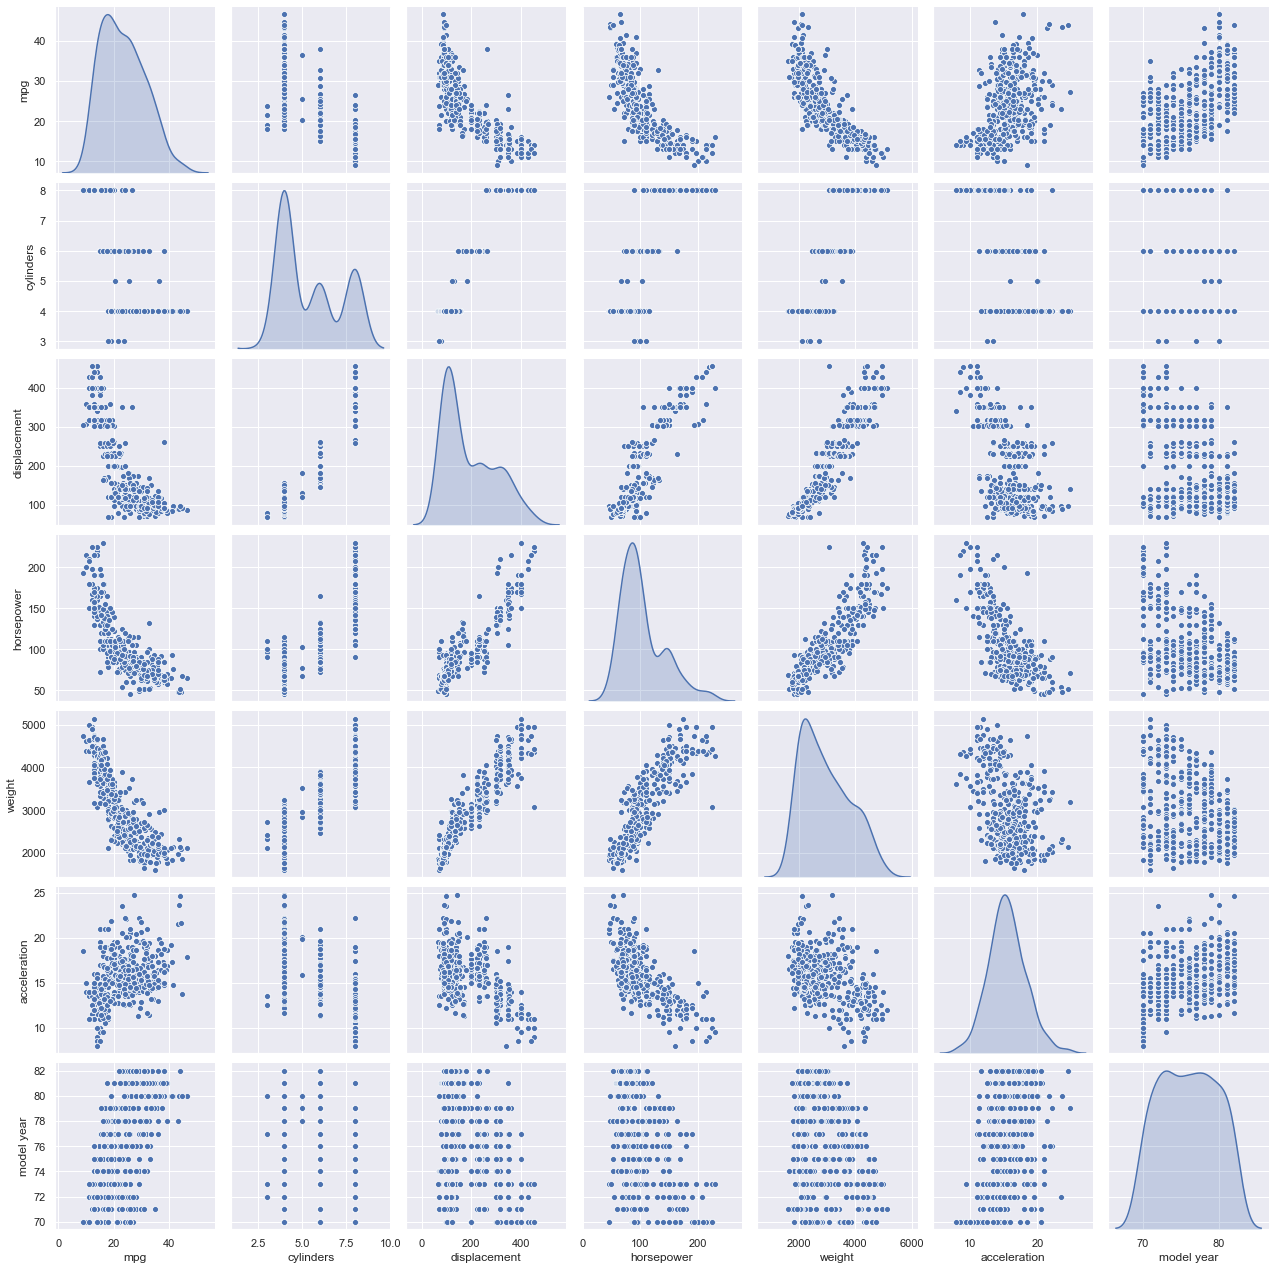

In [50]:
data_attr = data.iloc[:,0:7]
sns.pairplot(data_attr, diag_kind='kde'); # to plot density curve instead of hostogram on the diagonal

## Split data

In [51]:
x = data.drop(['mpg', 'origin_europe'], axis=1)
y = data[['mpg']]

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)

### Fit linear model

In [53]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

Here are the coefficients for each variable and the intercept:

In [54]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}.".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is -0.39480796616482666.
The coefficient for displacement is 0.028945510765487466.
The coefficient for horsepower is -0.02175220772354736.
The coefficient for weight is -0.00735203206514735.
The coefficient for acceleration is 0.06191936600761837.
The coefficient for model year is 0.8369338917645005.
The coefficient for origin_america is -3.0012830009185136.
The coefficient for origin_asia is -0.6060179643247388.


In [55]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -18.28345111637213


The score (R^2) for in-sample and out-of-sample

In [56]:
regression_model.score(x_train, y_train) # in-sample

0.8141025501610559

In [57]:
regression_model.score(x_test, y_test) # out-of-sample

0.8433135132808827

### Adding interaction terms

In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(x_train2, y_train)

y_pred = poly_clf.predict(x_test2)

print(poly_clf.score(x_train2,  y_train)) # In sample will always improve with number of variables

LinearRegression()

0.9015975293463855


In [59]:
print(poly_clf.score(x_test2, y_test)) # Outo-of-sample improves as well

0.8647441061366246


In [60]:
 # But we had to add 29 additional variables in order to improve
x_train.shape
x_train2.shape

(278, 8)

(278, 37)

Polynomial features (with only interaction terms) have improved the out-of-sample R^2. However, it is at the cost of increasing the number of variables from 8 to 37.